In [1]:
import wandb
import os
import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.font_manager as fm
import scipy
import tree
import json
import glob
fm.fontManager.addfont('../times.ttf')
fm.fontManager.addfont('../times_Italic.ttf')


In [2]:
fns = json.load(open("./main.json"))
flatten_fns = tree.flatten(fns)

In [3]:
features_of_interest = ["eval/rm_win_rate_prob", "misc/query_step"]

In [4]:
# Download

api = wandb.Api()
save_dir = "./main_data"
runs = api.runs("lkevinzc/ellm_simpo")
data_list = []
cfg_list = []

os.makedirs(save_dir, exist_ok=True)
for run in tqdm.tqdm(runs):
    cfg = run.config
    if run.name in flatten_fns:
        print(run.name)
        name = run.name
        if not os.path.exists(f"{save_dir}/{name}.csv"):
            data = run.history(keys=features_of_interest)
            data["seed"] = cfg["seed"]
            data["run_name"] = cfg["wandb_run_name"]
            
            if "dpo" in cfg["wandb_run_name"]:
                opt = "DPO"
            elif "apl" in cfg["wandb_run_name"]:
                opt = "DPO"
                method = "apl"
            elif "xpo" in cfg["wandb_run_name"]:
                opt = "DPO"
                method = "xpo"
            elif "ipo" in cfg["wandb_run_name"]:
                opt = "IPO"
            elif "slic" in cfg["wandb_run_name"]:
                opt = "SLiC"
            else:
                print(cfg["wandb_run_name"])
                raise RuntimeError
            if "online" in cfg["wandb_run_name"]:
                method = "online"
            elif "offline" in cfg["wandb_run_name"]:
                method = "offline"
            elif "sea" in cfg["wandb_run_name"]:
                method = "sea"
            if "1b" in cfg["pretrain"]:
                scale = "1B"
            elif "2.8b" in cfg["pretrain"]:
                scale = "2.8B"
            elif "6.9b" in cfg["pretrain"]:
                scale = "6.9B"
            data["dap"] = opt
            data["method"] = method
            data["scale"] = scale
            data.to_csv(f"{save_dir}/{name}.csv")

  6%|▌         | 51/819 [00:00<00:11, 66.54it/s]

skyworkrm_ipo_sea_beta0.3_0929T08:31
skyworkrm_slic_sea_0929T08:22
skyworkrm_slic_sea_0929T06:18
skyworkrm_ipo_offline_beta0.3_0929T05:09
skyworkrm_ipo_offline_beta0.3_0928T23:53


 12%|█▏        | 101/819 [00:01<00:09, 77.05it/s]

skyworkrm_slic_sea_0928T22:43
skyworkrm_slic_online_0928T21:33
skyworkrm_slic_offline_0928T20:49
skyworkrm_ipo_online_beta0.3_0928T20:15
skyworkrm_ipo_offline_beta0.3_0928T20:07
skyworkrm_slic_sea_0928T20:06
skyworkrm_slic_sea_0928T20:05
skyworkrm_slic_online_0928T18:15
skyworkrm_slic_offline_0928T17:57
skyworkrm_ipo_online_beta0.3_0928T15:21
skyworkrm_slic_online_0928T15:02
skyworkrm_slic_offline_0928T15:01
skyworkrm_slic_sea_0928T15:01
skyworkrm_slic_online_0928T14:22
skyworkrm_ipo_online_beta0.3_0928T13:58
skyworkrm_slic_offline_0928T13:58
skyworkrm_slic_online_0928T13:14
skyworkrm_ipo_sea_beta0.3_0928T12:09
skyworkrm_slic_offline_0928T11:29
skyworkrm_slic_online_0928T10:28
skyworkrm_slic_offline_0928T10:26
skyworkrm_slic_offline_0928T10:24
skyworkrm_slic_sea_0928T10:13
skyworkrm_slic_online_0928T08:01
skyworkrm_slic_online_0928T07:08
skyworkrm_slic_offline_0928T07:06
skyworkrm_slic_sea_0928T06:19
skyworkrm_slic_sea_0928T06:14
skyworkrm_slic_online_0928T06:14
skyworkrm_slic_offline_

 18%|█▊        | 151/819 [00:01<00:07, 90.68it/s]

skyworkrm_ipo_sea_beta0.3_0928T02:13
skyworkrm_ipo_onlinebeta05_0927T09:50
skyworkrm_ipo_offline_beta05_0927T09:39
skyworkrm_ipo_offline_beta05_0927T08:36
skyworkrm_ipo_offline_beta05_0927T07:33


 25%|██▍       | 201/819 [00:02<00:08, 75.65it/s]

skyworkrm_ipo_onlinebeta05_0927T04:31
skyworkrm_ipo_onlinebeta05_0927T02:36
skyworkrm_ipo_sea_beta0.5_0926T13:03
skyworkrm_dpo_sea_lmd0.2_0926T10:32
skyworkrm_ipo_sea_beta0.5_0926T08:00
skyworkrm_dpo_sea_lmd0.2_0926T05:34
skyworkrm_dpo_sea_0926T03:44
skyworkrm_ipo_sea_beta0.5_0926T02:42


 31%|███       | 251/819 [00:03<00:07, 79.50it/s]

skyworkrm_dpo_sea_lmd0.2_0925T20:10
skyworkrm_dpo_sea_0925T20:05
skyworkrm_ipo_sea_0925T15:57
skyworkrm_dpo_sea_0925T15:53
skyworkrm_dpo_sea_0925T12:16
skyworkrm_ipo_sea_0925T11:50
skyworkrm_dpo_sea_0925T11:49
skyworkrm_dpo_sea_0925T07:47
skyworkrm_ipo_sea_0925T07:42


 43%|████▎     | 351/819 [00:04<00:04, 94.35it/s]

skyworkrm_xpo_0922T14:48
skyworkrm_xpo_0922T14:37
skyworkrm_xpo_0922T14:30
skyworkrm_apl_0922T04:08
skyworkrm_apl_0922T03:48


 49%|████▉     | 401/819 [00:04<00:04, 100.14it/s]

skyworkrm_dpo_offline_0921T21:17
skyworkrm_dpo_online_0921T21:16
skyworkrm_apl_0921T18:00
skyworkrm_dpo_offline_0921T17:56
skyworkrm_dpo_online_0921T17:50
skyworkrm_ipo_online_0921T12:46
skyworkrm_ipo_offline_0921T12:45
skyworkrm_ipo_offline_0921T11:48
skyworkrm_ipo_online_0921T11:47
skyworkrm_xpo_0921T07:00
skyworkrm_dpo_offline_0921T06:59
skyworkrm_dpo_online_0921T06:59
skyworkrm_apl_0921T06:54
skyworkrm_apl_0921T06:40
skyworkrm_dpo_online_0921T03:38
skyworkrm_dpo_offline_0921T03:35
skyworkrm_xpo_0921T02:39
skyworkrm_dpo_offline_0921T01:12
skyworkrm_apl_0921T00:30
skyworkrm_xpo_0921T00:29
skyworkrm_xpo_0921T00:24
skyworkrm_apl_0921T00:20
skyworkrm_dpo_offline_0921T00:15
skyworkrm_dpo_online_0920T16:13
skyworkrm_dpo_online_0920T15:15
skyworkrm_apl_0920T15:13
skyworkrm_xpo_0920T15:11


 55%|█████▌    | 451/819 [00:05<00:04, 83.18it/s] 

skyworkrm_dpo_online_0918T04:02
skyworkrm_dpo_offline_0918T03:59
skyworkrm_dpo_offline_0918T02:32
skyworkrm_dpo_online_0918T01:53
skyworkrm_ipo_online_0917T14:06
skyworkrm_ipo_offline_0917T14:05
skyworkrm_dpo_online_0917T08:29
skyworkrm_apl_0917T07:44
skyworkrm_xpo_0917T07:41
skyworkrm_dpo_offline_0917T07:16


100%|██████████| 819/819 [00:08<00:00, 93.97it/s] 


In [5]:
fns = glob.glob("./main_data/*.csv")
dfs = [pd.read_csv(fn, index_col=0) for fn in fns]
df = pd.concat(dfs)
df

,_step,eval/rm_win_rate_prob,misc/query_step,seed,run_name,dap,method,scale
0,0,0.493378,0,2759564953,skyworkrm_slic_sea,SLiC,sea,6.9B
1,20,0.578772,1960,2759564953,skyworkrm_slic_sea,SLiC,sea,6.9B
2,50,0.713090,4600,2759564953,skyworkrm_slic_sea,SLiC,sea,6.9B
3,80,0.780614,7240,2759564953,skyworkrm_slic_sea,SLiC,sea,6.9B
4,110,0.804483,9880,2759564953,skyworkrm_slic_sea,SLiC,sea,6.9B
...,...,...,...,...,...,...,...,...
16,320,0.757781,40960,1816070529,skyworkrm_xpo,DPO,xpo,1B
17,340,0.765336,43520,1816070529,skyworkrm_xpo,DPO,xpo,1B
18,360,0.765762,46080,1816070529,skyworkrm_xpo,DPO,xpo,1B
19,380,0.768148,48640,1816070529,skyworkrm_xpo,DPO,xpo,1B


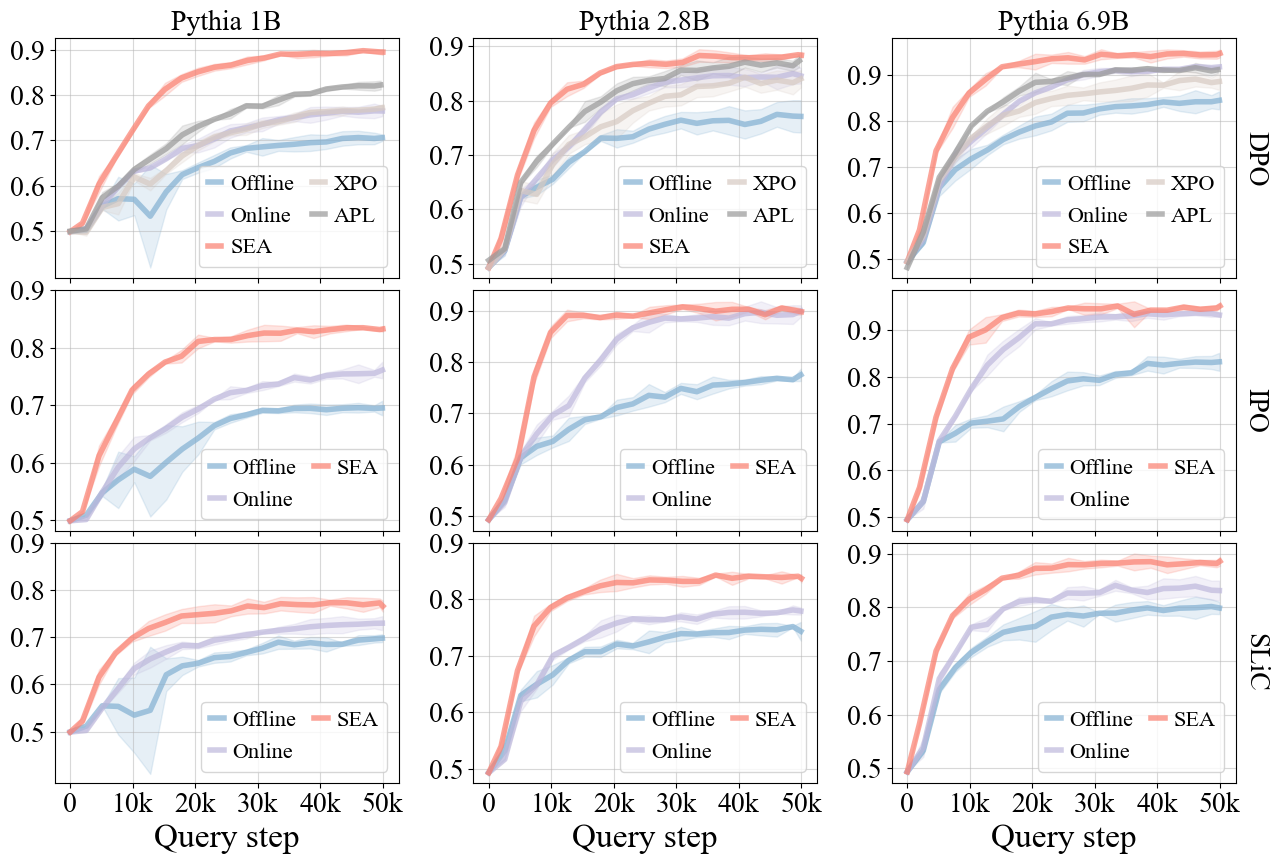

In [29]:
plt.rcParams.update({"font.family": "Times New Roman", "font.size": 20})

hue_order = [
    "offline",
    "online",
    "sea",
    "xpo",
    "apl",
]
# hue_order = [
#     "offline",
#     "online",
#     "xpo",
#     "apl",
#     "sea"
# ]
methods_to_color = {
    "offline": "#82b0d2",
    "online": "#beb8dc",
    "sea": "#fa7f6f",
    "xpo": "#D7CAC2",
    "apl": "#999999",
}
methods_to_labels= {
    "offline": "Offline",
    "online": "Online",
    "sea": "SEA",
    "xpo": "XPO",
    "apl": "APL"
}

g = sns.FacetGrid(df, row="dap", col="scale", hue="method", palette=methods_to_color,hue_order=hue_order,col_order=["1B", "2.8B", "6.9B"], row_order=["DPO", "IPO", 'SLiC'], sharey=False, margin_titles=True, aspect=3/2, despine=False)

g.map(sns.lineplot, "misc/query_step", "eval/rm_win_rate_prob", alpha=.7, dashes=False,linewidth=4, errorbar=('se', 2))
g.set_titles(col_template="Pythia {col_name}", row_template="{row_name}")
# ax_g=g.add_legend()

cnt = 0
for axes in g.axes:
    for ax in axes:
        cnt += 1
        ax.set_ylabel('', fontsize=18)
        ax.set_xlabel('Query step', fontsize=24)
        ax.set_xticks([0, 10_000, 20_000, 30_000, 40_000, 50_000],
              ["0", "10k", "20k", "30k", "40k", "50k"])
        ax.set_yticks([0.5, 0.6, 0.7, 0.8, 0.9])
        # ax.locator_params(axis='y', nbins=5)
        # ax.set_ylim(0.45, 0.98)
        # ax.set_title('title')
        # now you can obtain the axis from one of the axes
        x_axis = ax.get_xaxis()
        ax.grid(True, which="both", ls="-", c="0.7", alpha=0.5)
        ax.legend()
        sns.move_legend(
            ax, "best",
            # bbox_to_anchor=(0.45, -0.07), 
            ncol=2, 
            title=None, 
            frameon=True,
            labels=[methods_to_labels[k] for k in hue_order] if cnt <=3 else [methods_to_labels[k] for k in ["offline", "online", "sea"]],
            handletextpad=0.4,
            handlelength=0.6,
            columnspacing=0.8,
            fontsize=16,
        )

# sns.move_legend(
#     ax_g, "lower center",
#     bbox_to_anchor=(0.45, -0.07), 
#     ncol=5, 
#     title=None, 
#     frameon=True,
#     labels=[methods_to_labels[k] for k in hue_order],
#     # handletextpad=0.4,
#     # handlelength=0.6,
#     # columnspacing=0.8
# )
plt.subplots_adjust(hspace=0.05)
fig = ax.get_figure()
fig.savefig("main.pdf", bbox_inches="tight")